In [3]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/qaidin/dataset_warungpintar_ig/master/dataset_z3MeuQvK2LEhiXdcr.csv'
df = pd.read_csv(url)
df.head()

,firstComment,imageUrl,likesCount,locationName,ownerUsername,timestamp,url
0,#SobatWarung pasti tau dong 17 Agustus itu gak...,https://scontent-atl3-1.cdninstagram.com/vp/1a...,101,NaN,warungpintar.co,2019-08-17T08:59:19.000Z,https://www.instagram.com/p/B1Ql60LAWBX
1,Selamat Hari Kemerdekaan Indonesia yang ke-74!...,https://scontent-atl3-1.cdninstagram.com/vp/59...,137,NaN,warungpintar.co,2019-08-17T07:07:27.000Z,https://www.instagram.com/p/B1QZHXsgPLF
2,#SobatWarung pernah gak sih kalian punya suatu...,https://scontent-atl3-1.cdninstagram.com/vp/f5...,170,NaN,warungpintar.co,2019-08-16T05:53:10.000Z,https://www.instagram.com/p/B1Nr0gzAQPn
3,Gini nih jadinya kalau Juragan Warung dan AnWa...,https://scontent-atl3-1.cdninstagram.com/vp/91...,198,NaN,warungpintar.co,2019-08-15T11:37:09.000Z,https://www.instagram.com/p/B1LuZEbgyYh
4,Menjalankan perintahnya karena yakin akan menc...,https://scontent-atl3-1.cdninstagram.com/vp/4c...,271,NaN,warungpintar.co,2019-08-11T12:29:12.000Z,https://www.instagram.com/p/B1BhKwzAopd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
firstComment     200 non-null object
imageUrl         200 non-null object
likesCount       200 non-null int64
locationName     0 non-null float64
ownerUsername    200 non-null object
timestamp        200 non-null object
url              200 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 11.0+ KB


In [5]:
df1 = pd.DataFrame(df['firstComment'])
df1.head()

,firstComment
0,#SobatWarung pasti tau dong 17 Agustus itu gak...
1,Selamat Hari Kemerdekaan Indonesia yang ke-74!...
2,#SobatWarung pernah gak sih kalian punya suatu...
3,Gini nih jadinya kalau Juragan Warung dan AnWa...
4,Menjalankan perintahnya karena yakin akan menc...


In [11]:
df1.rename(columns={'firstComment':'text'},inplace = True)
df1.tail()

,text
195,Kalau Sobat Warung ada pertanyaan seputar prog...
196,"Selain anak SMA, MaWar juga sering ketemu sama..."
197,Sobat Warung yang punya akun Twitter sekarang ...
198,"Setelah hampir seminggu penuh kerja keras, akh..."
199,Sobat Warung bisa menemukan perbedaannya nggak...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
text    200 non-null object
dtypes: object(1)
memory usage: 1.6+ KB


In [10]:
 df2=df1['text'].str.cat(sep=' ')
 df2

'#SobatWarung pasti tau dong 17 Agustus itu gak akan bisa terwujud tanpa perjuangan para pahlawan? Tapi, tentunya mereka gak sendiri!\n\nContoh, dulu, Bung Karno bermimpi untuk bisa wujudin kemerdekaan buat Indonesia. Dalam perjalanannya menuju mimpi itu, ia gak sendirian. Ada Bung Hatta yang selalu mendukung dan berjuang bareng beliau.\n\nNah, itulah Sobat Warung, sehebat-hebatnya pahlawan, ia selalu punya teman untuk terus berjuang bareng. Kalau Sobat Warung siapa nih #Teman17an nya? Selamat Hari Kemerdekaan Indonesia yang ke-74!\n\n#SobatWarung udah ikut lomba apa aja nih? Ngomong-ngomong soal 17 Agustus, ternyata ini arti #Teman17an bagi beberapa Sobat Warung.\n\nKamu punya arti #Teman17an yang lain? Komen ya! #SobatWarung pernah gak sih kalian punya suatu mimpi terus ngerasa kesulitan buat ngewujudinnya sendiri dan akhirnya ketemu teman yang tepat untuk ngejar bareng mimpi itu?\n\nKemarin kita baru aja nanya apa arti #Teman17an menurut kamu, nah sekarang di Episode 9 Obrolan Warun

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [0]:
#removing numbers
def remove_num(df2):
    df2 = ''.join([i for i in df2 if not i.isdigit()])
    return df2

#executing function
df2 = np.vectorize(remove_num)(df2)

In [0]:
from string import punctuation
def remove_punct(df2):
    df2 = ' '.join(word.strip(punctuation) for word in df2.split() if word.strip(punctuation))
    return df2

#executing function
df2 = np.vectorize(remove_punct)(df2)

In [0]:
def remove_u(df2):
    df2 = df2.replace('_','')
    df2 = df2.replace('?','')
    df2 = df2.replace('•','')
    df2 = df2.replace("@",'')
    df2 = df2.replace('▯','')
    df2 = df2.replace("'",'')
    df2 = df2.replace(",",'')
    df2 = df2.replace("#",'')
    df2 = df2.replace("/",'')
    df2 = df2.replace("|",'')
    df2 = df2.replace("|",'')
    df2 = df2.replace("||",'')                  
    return df2

#executing function
df2 = np.vectorize(remove_u)(df2)

In [0]:
def remove_extra_space(df2):
    word_list = df2.split()
    df22 = ' '.join(word_list)
    return df2

#executing function
df2 = np.vectorize(remove_extra_space)(df2)

In [20]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [28]:
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Kalimat
stop = stopword.remove(df2)
print(stop)

SobatWarung tau dong Agustus gak terwujud perjuangan pahlawan Tapi tentunya gak sendiri Contoh dulu Bung Karno bermimpi wujudin kemerdekaan buat Indonesia Dalam perjalanannya menuju mimpi gak sendirian Ada Bung Hatta selalu mendukung berjuang bareng beliau Nah Sobat Warung sehebat-hebatnya pahlawan ia selalu punya teman terus berjuang bareng Kalau Sobat Warung siapa nih Temanan nya Selamat Hari Kemerdekaan Indonesia SobatWarung udah ikut lomba apa aja nih Ngomong-ngomong soal Agustus ternyata arti Temanan beberapa Sobat Warung Kamu punya arti Temanan Komen SobatWarung pernah gak sih kalian punya suatu mimpi terus ngerasa kesulitan buat ngewujudinnya sendiri akhirnya ketemu teman tepat ngejar bareng mimpi Kemarin baru aja nanya apa arti Temanan kamu nah sekarang Episode Obrolan Warung bezhariehadinegoro CEO Warung Pintar yudaaritonang Project Manager Warung Pintar nyeritain apa arti Teman an ⁣ Dengerin ObrolanWarung Spotify Apple Podcast 😊 Gini nih jadinya kalau Juragan Warung AnWar Ana

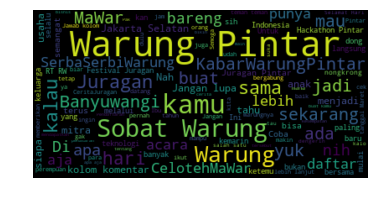

In [32]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#--------------------------------------------------------------------------------------

wordcloud = WordCloud().generate(stop)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()